An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
np.round(data.describe())

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.0,48842.0,48842.0,48842.0,48842.0,48842.0
mean,39.0,189664.0,10.0,1079.0,88.0,40.0
std,14.0,105604.0,3.0,7452.0,403.0,12.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117550.0,9.0,0.0,0.0,40.0
50%,37.0,178144.0,10.0,0.0,0.0,40.0
75%,48.0,237642.0,12.0,0.0,0.0,45.0
max,90.0,1490400.0,16.0,99999.0,4356.0,99.0


Let us look for numerical and categorical columns in the dataset

In [6]:
categorical = list()
numerical = list()
other = list()
for c,t in zip(data.dtypes.index.to_list(),data.dtypes.to_list()):
    if t=="object":
        categorical.append([c,t])
    elif t=="int64" or t=="float64":
        numerical.append([c,t])
    else:
        other.append([c,t])

print("Numerical Columns: ",numerical)
print("\nCategorical Columns: ",categorical)
print("\nOther Columns: ",other)

Numerical Columns:  [['age', dtype('int64')], ['fnlwgt', dtype('int64')], ['educational-num', dtype('int64')], ['capital-gain', dtype('int64')], ['capital-loss', dtype('int64')], ['hours-per-week', dtype('int64')]]

Categorical Columns:  [['workclass', dtype('O')], ['education', dtype('O')], ['marital-status', dtype('O')], ['occupation', dtype('O')], ['relationship', dtype('O')], ['race', dtype('O')], ['gender', dtype('O')], ['native-country', dtype('O')], ['income', dtype('O')]]

Other Columns:  []


In [7]:
#missing values
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

We can observe that there are some dummy values ?, so we will replace them with mode value.

In [9]:
data[data['workclass']=='?'].mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,20.0,?,41356,Some-college,10.0,Never-married,?,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,139391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
getValue = []
getValue.append(data[data["age"]==20]["workclass"].mode().to_list()[0])
getValue.append(data[data["education"]=="Some-college"]["workclass"].mode().to_list()[0])
getValue.append(data[data["educational-num"]==10.0]["workclass"].mode().to_list()[0])
getValue.append(data[data["marital-status"]=="Never-married"]["workclass"].mode().to_list()[0])
getValue.append(data[data["relationship"]=="Own-child"]["workclass"].mode().to_list()[0])
getValue.append(data[data["race"]=="White"]["workclass"].mode().to_list()[0])
getValue.append(data[data["gender"]=="Male"]["workclass"].mode().to_list()[0])
getValue.append(data[data["capital-gain"]==0.0]["workclass"].mode().to_list()[0])
getValue.append(data[data["capital-loss"]==0.0]["workclass"].mode().to_list()[0])
getValue.append(data[data["hours-per-week"]==40.0]["workclass"].mode().to_list()[0])
getValue.append(data[data["native-country"]=="United-States"]["workclass"].mode().to_list()[0])
getValue.append(data[data["income"]=="<=50K"]["workclass"].mode().to_list()[0])
getValue.append(data[data["fnlwgt"]==41356]["workclass"].mode().to_list()[0])
getValue

['Private',
 'Private',
 'Private',
 'Private',
 'Private',
 'Private',
 'Private',
 'Private',
 'Private',
 'Private',
 'Private',
 'Private',
 '?']

In [11]:
workclass_value=pd.DataFrame({"WorkclassValue":getValue})
workclass_value=workclass_value["WorkclassValue"].mode().to_list()[0]
data["workclass"].replace("?",workclass_value,inplace=True)

In [12]:
data[data['workclass']=='?'].mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [13]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

We can see that there are no missing or dummy values in education column.

In [14]:
data['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

We can see that there are no missing or dummy values in marital-status column.

In [15]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

We can observe that there are some dummy values ?, so we will replace them with mode value.

In [16]:
data[data['occupation']=='?'].mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,20.0,Private,41356,Some-college,10.0,Never-married,?,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,139391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
getValue = []
getValue.append(data[data["age"]==20]["occupation"].mode().to_list()[0])
getValue.append(data[data["education"]=="Some-college"]["occupation"].mode().to_list()[0])
getValue.append(data[data["educational-num"]==10.0]["occupation"].mode().to_list()[0])
getValue.append(data[data["marital-status"]=="Never-married"]["occupation"].mode().to_list()[0])
getValue.append(data[data["relationship"]=="Own-child"]["occupation"].mode().to_list()[0])
getValue.append(data[data["race"]=="White"]["occupation"].mode().to_list()[0])
getValue.append(data[data["gender"]=="Male"]["occupation"].mode().to_list()[0])
getValue.append(data[data["capital-gain"]==0.0]["occupation"].mode().to_list()[0])
getValue.append(data[data["capital-loss"]==0.0]["occupation"].mode().to_list()[0])
getValue.append(data[data["hours-per-week"]==40.0]["occupation"].mode().to_list()[0])
getValue.append(data[data["native-country"]=="United-States"]["occupation"].mode().to_list()[0])
getValue.append(data[data["income"]=="<=50K"]["occupation"].mode().to_list()[0])
getValue.append(data[data["fnlwgt"]==41356]["occupation"].mode().to_list()[0])
getValue.append(data[data["workclass"]=="Private"]["occupation"].mode().to_list()[0])
getValue

['Other-service',
 'Adm-clerical',
 'Adm-clerical',
 'Other-service',
 'Other-service',
 'Craft-repair',
 'Craft-repair',
 'Craft-repair',
 'Craft-repair',
 'Craft-repair',
 'Exec-managerial',
 'Adm-clerical',
 '?',
 'Craft-repair']

In [18]:
occupation_value=pd.DataFrame({"OccupationValue":getValue})
occupation_value=occupation_value["OccupationValue"].mode().to_list()[0]
data["occupation"].replace("?",occupation_value,inplace=True)

In [19]:
data[data['occupation']=='?'].mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [20]:
data['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

We can see that there are no missing or dummy values in relationship column.

In [21]:
data['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

We can see that there are no missing or dummy values in race column.

In [22]:
data['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

We can see that there are no missing or dummy values in gender column.

In [23]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

We can observe that there are some dummy values ?, so we will replace them with mode value.

In [24]:
data[data['native-country']=='?'].mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,Private,320451,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,<=50K


In [25]:
getValue = []
getValue.append(data[data["age"]==37]["native-country"].mode().to_list()[0])
getValue.append(data[data["education"]=="Bachelors"]["native-country"].mode().to_list()[0])
getValue.append(data[data["educational-num"]==13]["native-country"].mode().to_list()[0])
getValue.append(data[data["marital-status"]=="Married-civ-spouse"]["native-country"].mode().to_list()[0])
getValue.append(data[data["relationship"]=="Husband"]["native-country"].mode().to_list()[0])
getValue.append(data[data["race"]=="White"]["native-country"].mode().to_list()[0])
getValue.append(data[data["gender"]=="Male"]["native-country"].mode().to_list()[0])
getValue.append(data[data["capital-gain"]==0]["native-country"].mode().to_list()[0])
getValue.append(data[data["capital-loss"]==0]["native-country"].mode().to_list()[0])
getValue.append(data[data["hours-per-week"]==40]["native-country"].mode().to_list()[0])
getValue.append(data[data["occupation"]=="Prof-specialty"]["native-country"].mode().to_list()[0])
getValue.append(data[data["income"]=="<=50K"]["native-country"].mode().to_list()[0])
getValue.append(data[data["fnlwgt"]==320451]["native-country"].mode().to_list()[0])
getValue.append(data[data["workclass"]=="Private"]["native-country"].mode().to_list()[0])
getValue

['United-States',
 'United-States',
 'United-States',
 'United-States',
 'United-States',
 'United-States',
 'United-States',
 'United-States',
 'United-States',
 'United-States',
 'United-States',
 'United-States',
 '?',
 'United-States']

In [26]:
native_value=pd.DataFrame({"NativeValue":getValue})
native_value=native_value["NativeValue"].mode().to_list()[0]
data["native-country"].replace("?",native_value,inplace=True)

In [27]:
data[data['native-country']=='?'].mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [28]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

We can see that there are no missing or dummy values in gender column.

In [29]:
#correlation between the variables
data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


From the above plot, we can see that no columns are highly correlated, therefore they are independent columns.

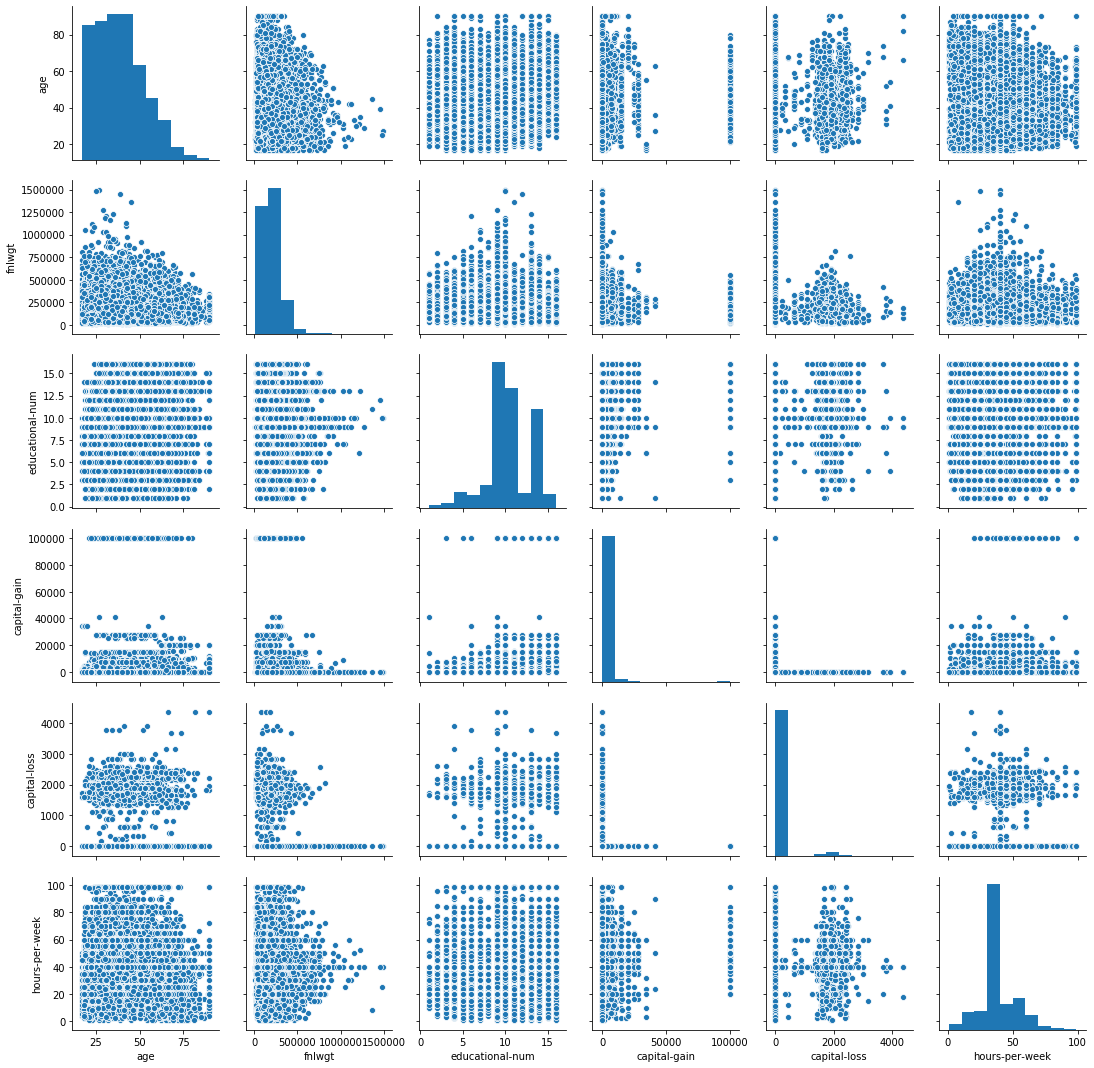

In [30]:
sns.pairplot(data)

Miniumum age: 17
Maximum age: 90


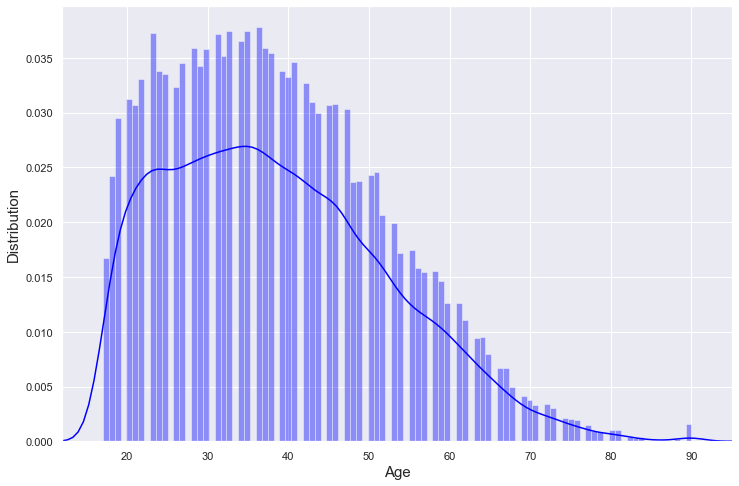

In [31]:
print('Miniumum age:', data['age'].min())
print('Maximum age:', data['age'].max())
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style='darkgrid')
sns.distplot(data['age'], bins=100, color='blue')
plt.ylabel("Distribution", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.margins(x=0)

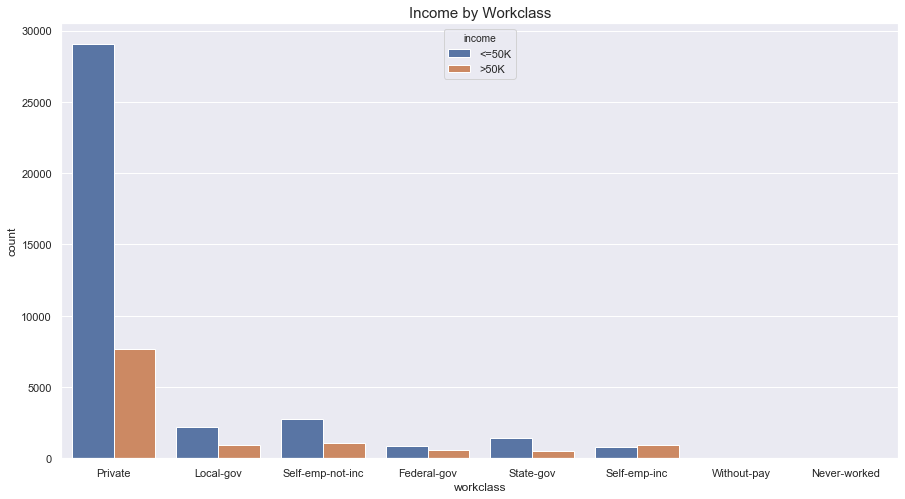

In [32]:
plt.figure(figsize=(15,8))
plt.title('Income by Workclass', fontsize=15)
sns.countplot(data['workclass'], hue=data['income'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

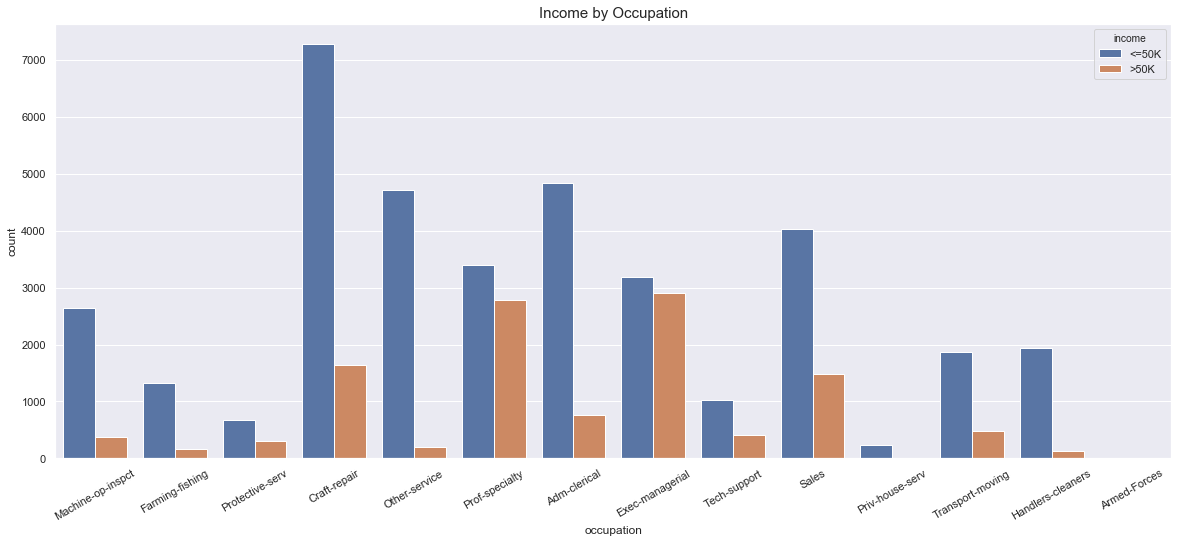

In [33]:
plt.figure(figsize=(20,8))
plt.title('Income by Occupation', fontsize=15)
sns.countplot(data['occupation'], hue=data['income'])
plt.xticks(rotation=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

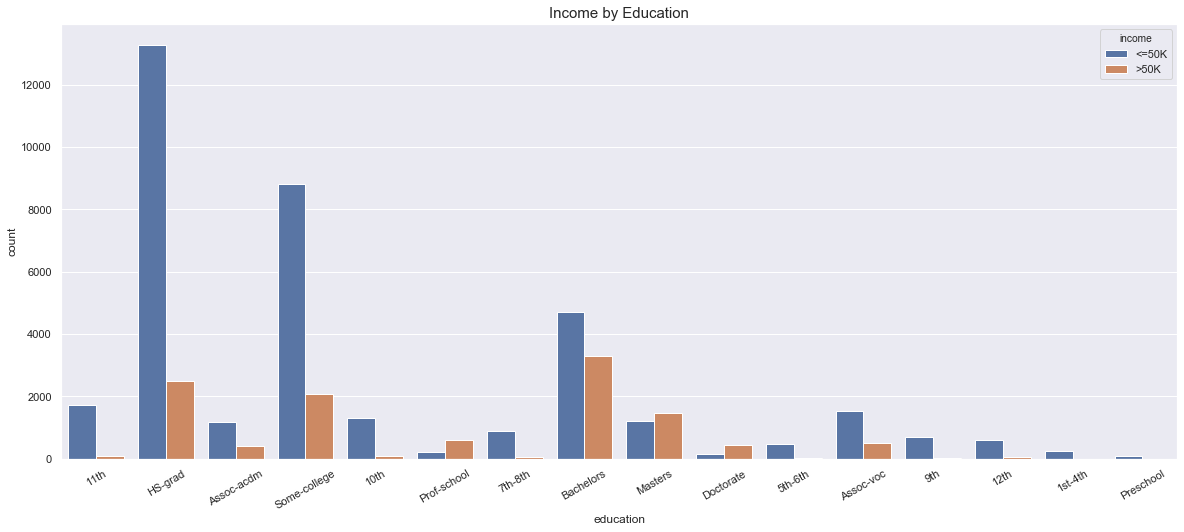

In [34]:
plt.figure(figsize=(20,8))
plt.title('Income by Education', fontsize=15)
sns.countplot(data['education'], hue=data['income'])
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

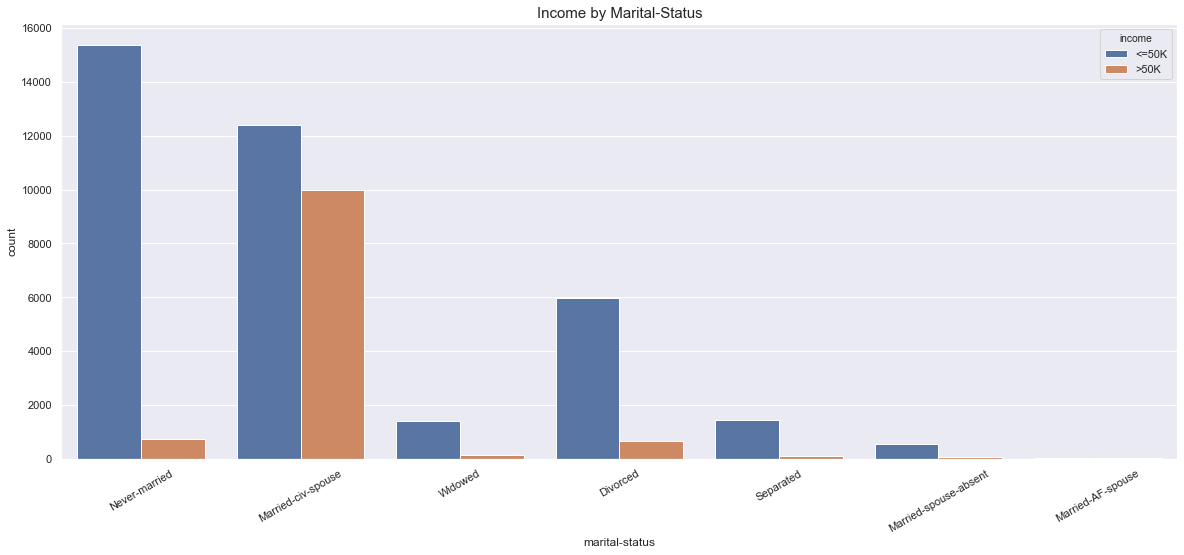

In [35]:
plt.figure(figsize=(20,8))
plt.title('Income by Marital-Status', fontsize=15)
sns.countplot(data['marital-status'], hue=data['income'])
plt.xticks(rotation=30)

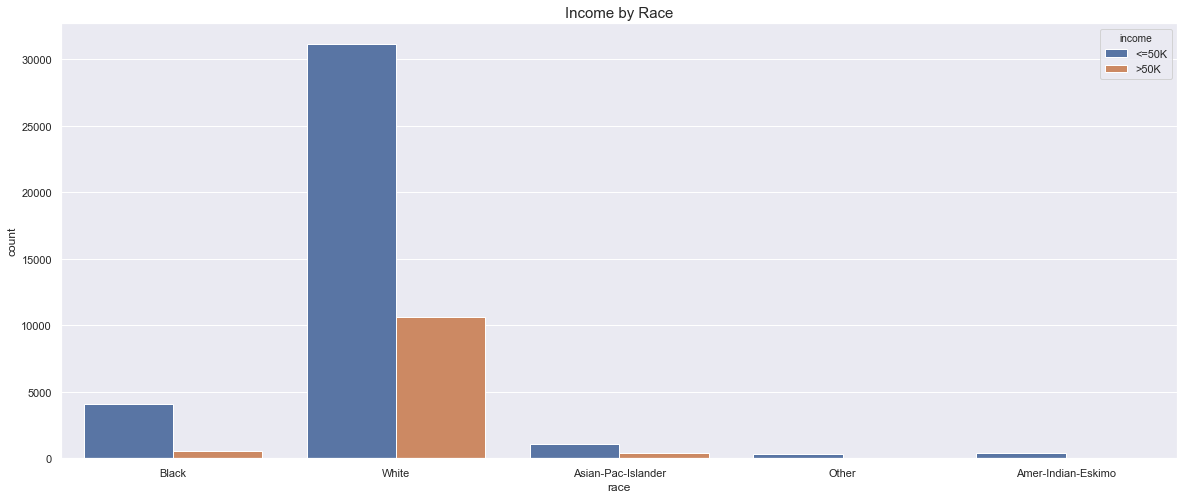

In [36]:
plt.figure(figsize=(20,8))
plt.title('Income by Race', fontsize=15)
sns.countplot(data['race'], hue=data['income'])

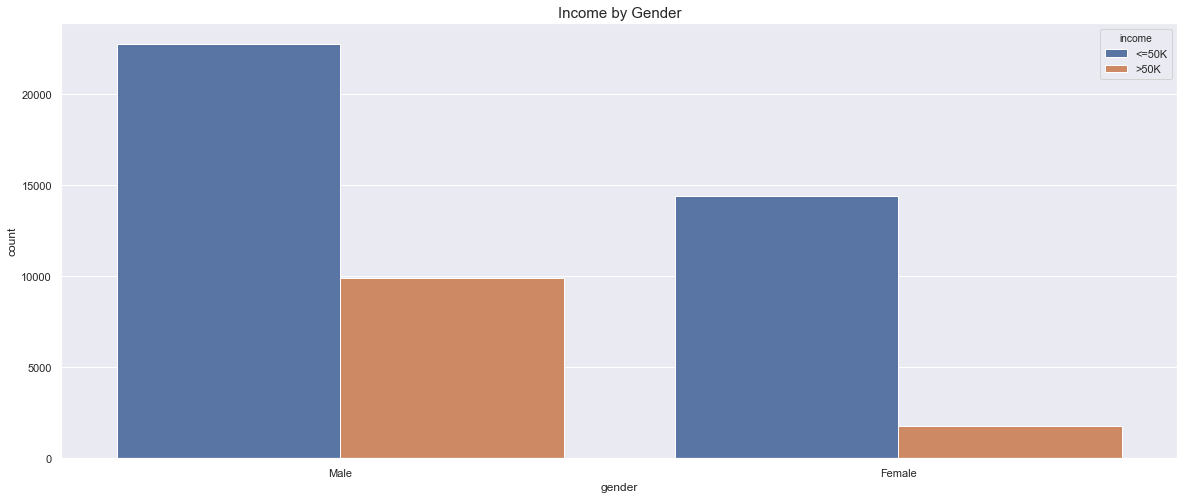

In [37]:
plt.figure(figsize=(20,8))
plt.title('Income by Gender', fontsize=15)
sns.countplot(data['gender'], hue=data['income'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

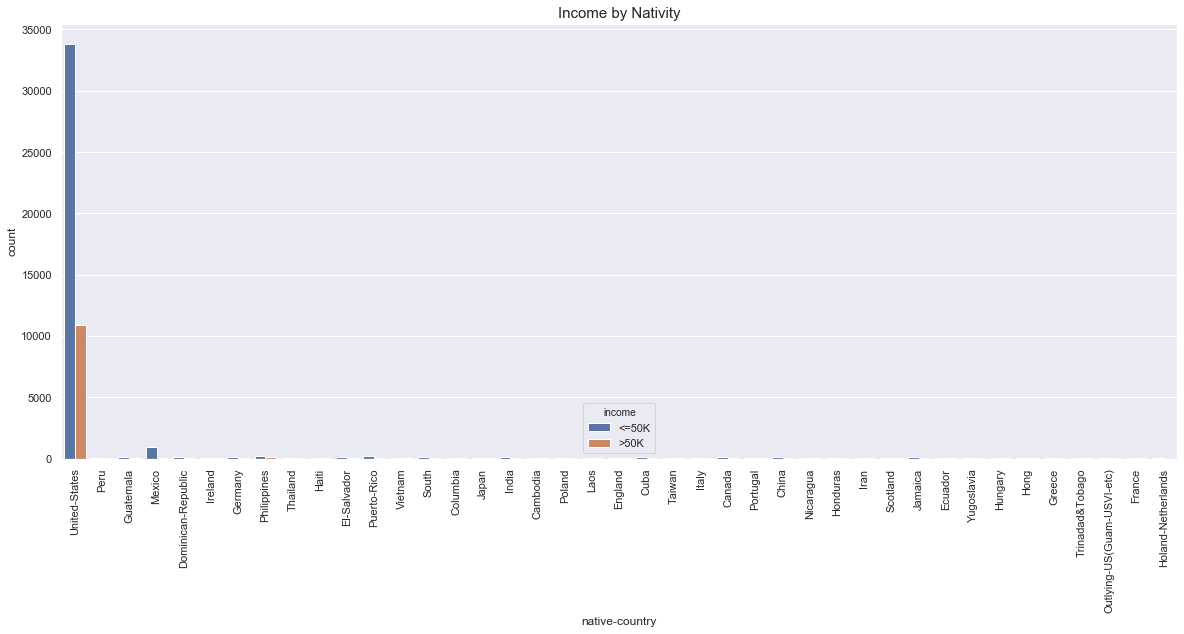

In [38]:
plt.figure(figsize=(20,8))
plt.title('Income by Nativity', fontsize=15)
sns.countplot(data['native-country'], hue=data['income'])
plt.xticks(rotation=90)

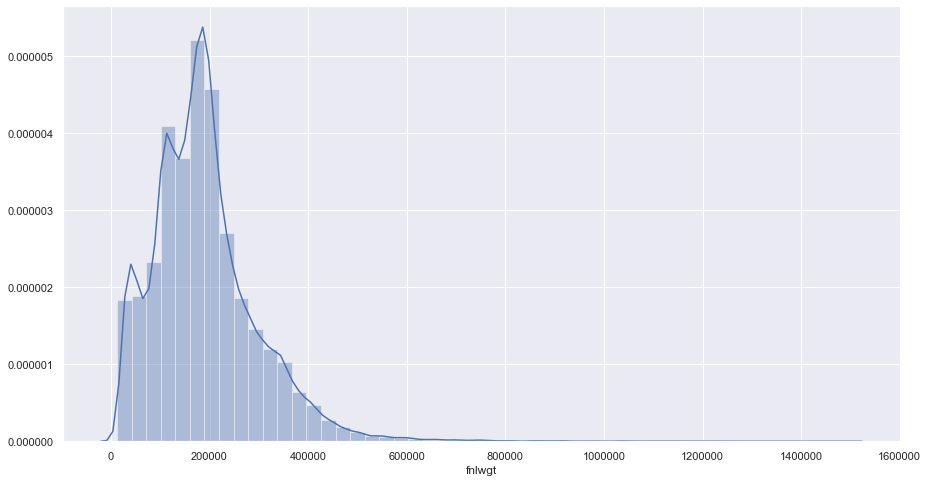

In [39]:
plt.figure(figsize=(15,8))
sns.distplot(data['fnlwgt'])

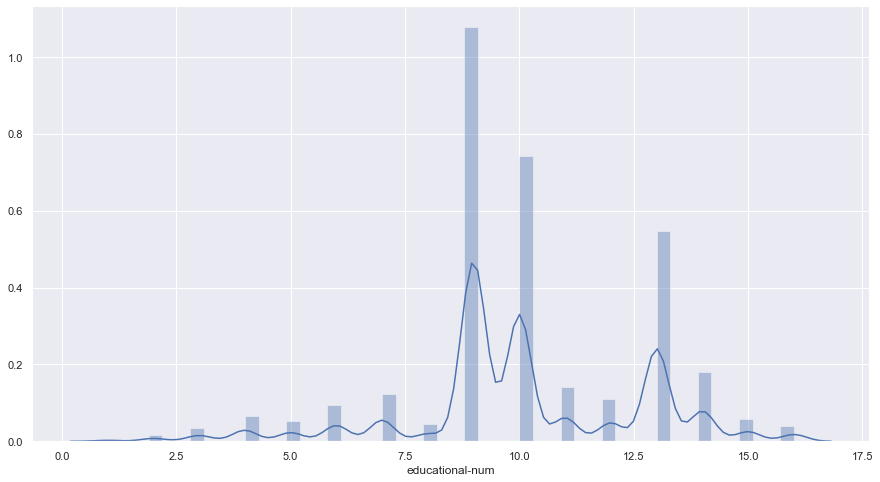

In [40]:
plt.figure(figsize=(15,8))
sns.distplot(data['educational-num'])

# ML Models

In [41]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

### Feature Selection and Encoding

In [42]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [43]:
data_df = data.apply(LabelEncoder().fit_transform)
data_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,1,6,4,6,3,2,1,0,0,39,38,0
1,21,3,4212,11,8,2,4,0,4,1,0,0,49,38,0
2,11,1,25340,7,11,2,10,0,4,1,0,0,39,38,1
3,27,3,11201,15,9,2,6,0,2,1,98,0,39,38,1
4,1,3,5411,15,9,4,2,3,4,0,0,0,29,38,0


### Train-Test Split

In [44]:
drop_elements = ['education', 'native-country', 'income']
y = data_df["income"]
X = data_df.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,8,3,19329,6,4,6,3,2,1,0,0,39
1,21,3,4212,8,2,4,0,4,1,0,0,49
2,11,1,25340,11,2,10,0,4,1,0,0,39
3,27,3,11201,9,2,6,0,2,1,98,0,39
4,1,3,5411,9,4,2,3,4,0,0,0,29


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Classification Models

### 1. Perceptron method

In [46]:
#Perceptron method
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)

0.7785853209130924

In [48]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

0.7719383923422207

### 2. Gaussian Naive Bayes

In [49]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('Accuracy: ', score_gaussian)

Accuracy:  0.812672740300952


### 3. Linear Support Vector Machine

In [50]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('Accuracy: ', score_svc)

Accuracy:  0.765277919950865


### 4. Logistic Regression

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('Accuracy: ', score_logreg)

C:\Users\sowmy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.8053024874603337


### 5. Random Forest

In [52]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('Accuracy: ', score_randomforest)

C:\Users\sowmy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.8493192752584706


### 6. K-Nearest Neighbours

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('Accuracy: ',score_knn)

Accuracy:  0.779301873272597


In [104]:
model_array = np.array(['Perceptron method','Gaussian Naive Bayes','Linear SVM','Logistic Regression','Random Forest','KNN'])
accuracy_array = np.array([accuracy_score,score_gaussian,score_svc,score_logreg,score_randomforest,score_knn])

In [114]:
print(np.stack((model_array, accuracy_array), axis=1))

[['Perceptron method' <function accuracy_score at 0x000002496DA60288>]
 ['Gaussian Naive Bayes' 0.812672740300952]
 ['Linear SVM' 0.765277919950865]
 ['Logistic Regression' 0.8053024874603337]
 ['Random Forest' 0.8493192752584706]
 ['KNN' 0.779301873272597]]


From the above ML models, we can see that Random Forest model is more accurate.